![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)



# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

---

# **Proyecto de Competencia Kaggle: Predicción de Abandono de Clientes**

## **Curso:** Diplomado en Ciencia de Datos

# **Nombres de los Miembros del Equipo:**
### *   [Nombre Completo del Miembro 1]
### *   [Nombre Completo del Miembro 2]
### *   [Nombre Completo del Miembro 3]

# **Objetivo:**
## El objetivo de este proyecto es construir y evaluar varios modelos de clasificación para predecir si un cliente de una compañía de telecomunicaciones abandonará o no el servicio (churn). El rendimiento final del mejor modelo se medirá en la competencia de Kaggle a través de la **métrica ROC AUC**.


---

# **Enlace para unirse a la competencia**
### **USE EL ENLACE PARA UNIRSE POR EQUIPO, NO DE MANERA INDIVIDUAL**

https://www.kaggle.com/t/57b70c381e4d451b8ae38e164b91a2aa


### **Por favor siga las indicaciones que se suministran en la plataforma**


# 0. **Configuración Inicial e Importación de Librerías**

## En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.


In [11]:
# Importaciones básicas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report, 
                           confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Any
import warnings
warnings.filterwarnings('ignore')


# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Importar módulos del proyecto (si existen)
try:
    import data_loader
    import dataset_splitter
    import eda
    import models
    import metrics
    print("✅ Módulos del proyecto importados correctamente")
except ImportError as e:
    print(f"⚠️ Algunos módulos del proyecto no están disponibles: {e}")
    print("💡 Puedes trabajar directamente en el notebook por ahora")

✅ Módulos del proyecto importados correctamente


#  **1. Carga de Datos**

## Cargaremos los datasets proporcionados para la competencia: `train.csv`, `test.csv` y `sample_submission.csv`.

In [12]:
try:
    X_train = pd.read_csv('train.csv')
    X_test = pd.read_csv('test.csv')
    sample_submission_df = pd.read_csv('sample_submission.csv')
except FileNotFoundError:
    print("Asegúrate de que los archivos .csv de la competencia estén en el mismo directorio que este cuaderno.")
    # Si usas Colab, puedes subir los archivos al entorno de ejecución.
    exit()

print("Forma del dataset de entrenamiento:", X_train.shape)
print("Forma del dataset de prueba:", X_test.shape)

print("\nPrimeras 5 filas del dataset de entrenamiento:")
display(X_train.head())

print("\nPrimeras 5 filas del dataset de prueba:")
display(X_test.head())

Forma del dataset de entrenamiento: (5634, 21)
Forma del dataset de prueba: (1409, 20)

Primeras 5 filas del dataset de entrenamiento:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No



Primeras 5 filas del dataset de prueba:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20
1,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20
3,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
4,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35


# 2**. Análisis Exploratorio de Datos (EDA)**

## En esta fase, exploraremos el dataset de entrenamiento para entender mejor nuestros datos, encontrar patrones, identificar valores faltantes y visualizar relaciones entre las características y la variable objetivo (`Churn`).

## Objetivo: conocer distribución de datos, target, tipos de columnas.

Variables como Contract, InternetService, PaymentMethod requieren OneHotEncoding o LabelEncoding. #TODO: Verificar.

Target Churn: dataset más desbalanceado (~20% churn). #Verificar el desbalanceo.

## Descripción de parámetros




📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (5634, 21)
Columnas: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

📋 Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
d

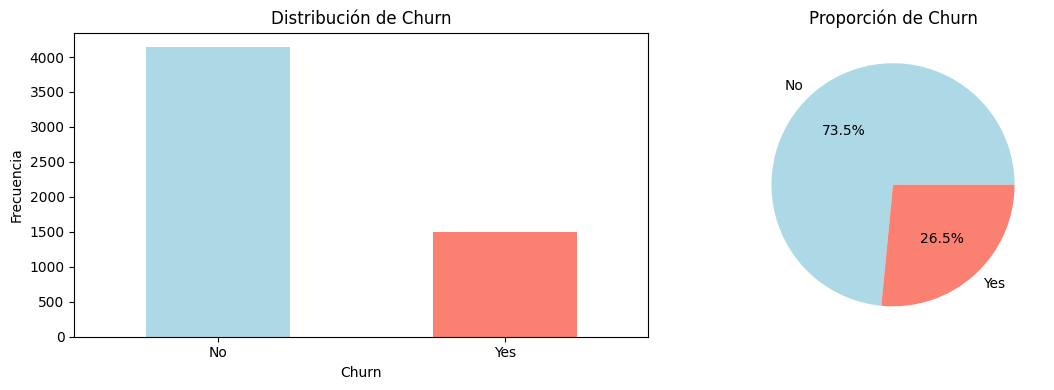

In [13]:
# Información general del dataset
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Dimensiones: {X_train.shape}")
print(f"Columnas: {list(X_train.columns)}")
print("\n📋 Tipos de datos:")
print(X_train.dtypes)

# Información sobre valores faltantes
print("\n🔍 VALORES FALTANTES:")
print("=" * 30)
missing_values = X_train.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("✅ No hay valores faltantes")

# Distribución de la variable objetivo
print("\n🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Churn):")
print("=" * 50)
y_train = X_train['Churn']
churn_counts = y_train.value_counts()
#Definición de variable objetivo
churn_pct = y_train.value_counts(normalize=True) * 100
print(f"No Churn (0): {churn_counts[0]} ({churn_pct[0]:.1f}%)")
print(f"Churn (1): {churn_counts[1]} ({churn_pct[1]:.1f}%)")

# Visualización de la distribución del target
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y_train.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Proporción de Churn')
plt.ylabel('')

plt.tight_layout()
plt.show()

# **3. Preprocesamiento de Datos**

## Prepararemos los datos para que puedan ser utilizados por los modelos de Machine Learning.

In [14]:
# 3.1 - Preprocesamiento de datos usando los modelos creados
from models import ChurnPredictor

# Inicializar el predictor
predictor = ChurnPredictor(random_state=42)

# Crear el preprocesador
predictor.create_preprocessor(X_train)

print("✅ Preprocesador configurado exitosamente")
X_features = X_train.shape[1]
print(f"📊 Características a procesar: {X_features}")

#Mostrar estado de columnas luego del preprocesamiento.
predictor.inspect_transformed_columns(
    X_original=X_train,
    columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
)

# Mostrar información del preprocesador
print("\n🔧 Configuración del preprocesador:")
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns                      
                                         
print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")

📊 Preprocesador configurado:
   - Numéricas: ['MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'tenure']
   - Binarias: ['Churn', 'Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport']
   - Categóricas: ['Contract', 'InternetService', 'PaymentMethod', 'gender']
✅ Preprocesador configurado exitosamente
📊 Características a procesar: 21
🔍 Inspeccionando transformación de columnas: ['Partner', 'Dependents', 'Contract', 'PaymentMethod']

🗂️  Valores originales:
  Partner Dependents        Contract            PaymentMethod
0      No         No  Month-to-month         Electronic check
1     Yes        Yes  Month-to-month             Mailed check
2     Yes        Yes        Two year             Mailed check
3     Yes         No        Two year  Credit card (automatic)
4     Yes        Yes  Month-to-month         Electronic check
⚙️  Valores transformados:
  Partner De

In [15]:
# 3.2 - Inspección de transformaciones de columnas
# La función inspect_transformed_columns es un MÉTODO de la clase ChurnPredictor
# Se debe llamar usando la instancia: predictor.inspect_transformed_columns()

print("🔍 Inspeccionando transformaciones de columnas específicas...")

try:
    # Usar el MÉTODO de la instancia predictor (no como función independiente)
    predictor.inspect_transformed_columns(
        X_original=X_train,
        columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod'],
        fit=False  # False porque ya hicimos fit anteriormente
    )
except Exception as e:
    print(f"⚠️ Error al inspeccionar columnas: {e}")
    print("💡 Continuando con el análisis básico...")
    
    # Análisis alternativo si la función falla
    print("\n📊 Análisis básico de columnas seleccionadas:")
    selected_cols = ['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    for col in selected_cols:
        if col in X_train.columns:
            print(f"   - {col}: {X_train[col].unique()}")
        else:
            print(f"   - {col}: ❌ No encontrada en el dataset")

🔍 Inspeccionando transformaciones de columnas específicas...
🔍 Inspeccionando transformación de columnas: ['Partner', 'Dependents', 'Contract', 'PaymentMethod']

🗂️  Valores originales:
  Partner Dependents        Contract            PaymentMethod
0      No         No  Month-to-month         Electronic check
1     Yes        Yes  Month-to-month             Mailed check
2     Yes        Yes        Two year             Mailed check
3     Yes         No        Two year  Credit card (automatic)
4     Yes        Yes  Month-to-month         Electronic check
⚙️  Valores transformados:
  Partner Dependents Contract_One year Contract_Two year  \
0     0.0        0.0               0.0               0.0   
1     1.0        1.0               0.0               0.0   
2     1.0        1.0               0.0               1.0   
3     1.0        0.0               0.0               1.0   
4     1.0        1.0               0.0               0.0   

  PaymentMethod_Credit card (automatic) PaymentMethod_

**4. Modelado y Evaluación**

## Ahora entrenaremos y evaluaremos los tres modelos requeridos:
## Regresión Logística, k-NN y Naive Bayes.

In [16]:
# Celda única para importar siempre la versión más reciente de tu clase

import sys
import importlib

# Ruta a tu módulo (ajustá si es necesario)
module_name = "models"

# Eliminar del caché de módulos si ya estaba cargado
if module_name in sys.modules:
    del sys.modules[module_name]

# Importar y recargar
import models
importlib.reload(models)

# Instanciar la clase
predictor = models.ChurnPredictor()


In [17]:
# 4.1 Modelado 
print("🤖 Iniciando entrenamiento de modelos...")

# Preparar datos para la división train/validation
print("🔧 Preparando datos para división train/validation...")

# Cargar datos originales si es necesario
try:
    # Separar features y target
    y = X_train["Churn"]
    print(f"📊 Variable objetivo extraída: {y.shape}")
    
    # Extraer características (X) - remover Churn y customerID
    columns_to_drop = ['Churn']
    if 'customerID' in X_train.columns:
        columns_to_drop.append('customerID')
  
    X = X_train.drop(columns_to_drop, axis=1)
    print(f"📊 Características extraídas: {X.shape}")
    print(f"📋 Columnas removidas: {columns_to_drop}")
    
except Exception as e:
    print(f"❌ Error preparando datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente")

# Dividir datos en entrenamiento y validación interna
print("\n🔄 Dividiendo datos en train/validation interno...")
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

🤖 Iniciando entrenamiento de modelos...
🔧 Preparando datos para división train/validation...
📊 Variable objetivo extraída: (5634,)
📊 Características extraídas: (5634, 19)
📋 Columnas removidas: ['Churn', 'customerID']

🔄 Dividiendo datos en train/validation interno...


In [18]:
# 4.2 Crear el preprocesador para datos de validación.
try:
    predictor.create_preprocessor(X_val)
    
    print("✅ Preprocesador configurado exitosamente")
    X_val_features = X_val.shape[1]
    print(f"📊 Características a procesar: {X_val_features}")
    
    #Mostrar estado de columnas luego del preprocesamiento.
    predictor.inspect_transformed_columns(
        X_original=X_val,
        columns=['Partner', 'Dependents', 'Contract', 'PaymentMethod']
    )
    
    # Mostrar información del preprocesador
    print("\n🔧 Configuración del preprocesador:")
    numeric_features = X_val.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_val.select_dtypes(include=['object']).columns                      
                                             
    print(f"   - Características numéricas: {len(numeric_features)} : {numeric_features}")
    print(f"   - Características categóricas: {len(categorical_features)}: {categorical_features}")
except Exception as e:
    print(f"❌ Error preprocesando los datos: {e}")
    print("💡 Asegúrate de que el dataset esté cargado correctamente") 



📊 Preprocesador configurado:
   - Numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
   - Binarias: ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
   - Categóricas: ['gender', 'InternetService', 'Contract', 'PaymentMethod']
✅ Preprocesador configurado exitosamente
📊 Características a procesar: 19
🔍 Inspeccionando transformación de columnas: ['Partner', 'Dependents', 'Contract', 'PaymentMethod']

🗂️  Valores originales:
     Partner Dependents        Contract     PaymentMethod
4882     Yes        Yes  Month-to-month  Electronic check
515       No         No        Two year      Mailed check
4694     Yes        Yes        One year      Mailed check
42       Yes        Yes  Month-to-month      Mailed check
11       Yes        Yes  Month-to-month      Mailed check
⚙️  Valores transformados:
  Partner Dependents Contract_One year Contra

In [19]:
# 4.3 Crear y entrenar los modelos

# Datos a evaluar
print("\n📊 X_val : ")
display(X_val.head(5))
print("\n📊 y_val original")
display(y_val.head(5))   

# IMPORTANTE: Mapear TANTO y_train_split como y_val para consistencia de tipos
print("\n📊 Mapeando datos para entrenamiento y evaluación...")
y_train_mapped = predictor.map_target(y_train_split)  # Mapear datos de entrenamiento
y_val_mapped = predictor.map_target(y_val)           # Mapear datos de validación

print("\n📊 y_train_mapped")
display(y_train_mapped.head(5))   
print("\n📊 y_val_mapped")
display(y_val_mapped.head(5))   

models = predictor.create_models()

# Entrenar todos los modelos con datos mapeados
print(f"\n🎯 Entrenando modelos con datos mapeados...")
predictor.train_models(X_train_split, y_train_mapped)

print("\n🎉 Entrenamiento completado para todos los modelos:")

for model_name in models.keys():
    print(f"   ✅ {model_name}")

print(f"\n📊 Modelos entrenados con {len(X_train_split):,} muestras")

# Actualizar y_val para evaluación posterior
y_val = y_val_mapped


📊 X_val : 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4882,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.20
515,Female,0,No,No,47,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Mailed check,65.00,2879.90
4694,Female,0,Yes,Yes,14,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.55,294.50
42,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20
11,Female,0,Yes,Yes,5,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.40,232.55



📊 y_val original


4882    No
515     No
4694    No
42      No
11      No
Name: Churn, dtype: object


📊 Mapeando datos para entrenamiento y evaluación...
🔍 Valores únicos antes del mapeo: ['No' 'Yes']
✅ Valores únicos después del mapeo: [0 1]
🔍 Valores únicos antes del mapeo: ['No' 'Yes']
✅ Valores únicos después del mapeo: [0 1]

📊 y_train_mapped


5100    0
2777    0
2627    0
2185    1
4147    0
Name: Churn, dtype: int64


📊 y_val_mapped


4882    0
515     0
4694    0
42      0
11      0
Name: Churn, dtype: int64

🤖 Modelos creados: ['Logistic_Regression', 'KNN', 'Naive_Bayes', 'Random_Forest']

🎯 Entrenando modelos con datos mapeados...
🎯 Entrenando modelos...
   - Muestras de entrenamiento: 4,507
   - Características: 19
   🔄 Entrenando Logistic_Regression...
   ✅ Logistic_Regression entrenado
   🔄 Entrenando KNN...
   ✅ KNN entrenado
   🔄 Entrenando Naive_Bayes...
   ✅ Naive_Bayes entrenado
   🔄 Entrenando Random_Forest...
   ✅ Random_Forest entrenado
🎉 Todos los modelos entrenados exitosamente

🎉 Entrenamiento completado para todos los modelos:
   ✅ Logistic_Regression
   ✅ KNN
   ✅ Naive_Bayes
   ✅ Random_Forest

📊 Modelos entrenados con 4,507 muestras


📊 Evaluando modelos...
   - Muestras de validación: 1,127
   - Valores únicos en y_val: [0 1]
   🔍 Evaluando Logistic_Regression...
   🔧 Debug para Logistic_Regression:
      - Tipo y_val: <class 'pandas.core.series.Series'>, valores únicos: [0 1]
      - Tipo y_pred: <class 'numpy.ndarray'>, valores únicos: [0 1]
   ✅ Tipos finales - y_val: <class 'numpy.ndarray'>, y_pred: <class 'numpy.ndarray'>
   ✅ Valores únicos finales - y_val: [0 1], y_pred: [0 1]
   ✅ Logistic_Regression - ROC AUC: 0.8482
   🔍 Evaluando KNN...
   🔧 Debug para KNN:
      - Tipo y_val: <class 'pandas.core.series.Series'>, valores únicos: [0 1]
      - Tipo y_pred: <class 'numpy.ndarray'>, valores únicos: [0 1]
   ✅ Tipos finales - y_val: <class 'numpy.ndarray'>, y_pred: <class 'numpy.ndarray'>
   ✅ Valores únicos finales - y_val: [0 1], y_pred: [0 1]
   ✅ KNN - ROC AUC: 0.7842
   🔍 Evaluando Naive_Bayes...
   🔧 Debug para Naive_Bayes:
      - Tipo y_val: <class 'pandas.core.series.Series'>, valores únicos: [0 1]


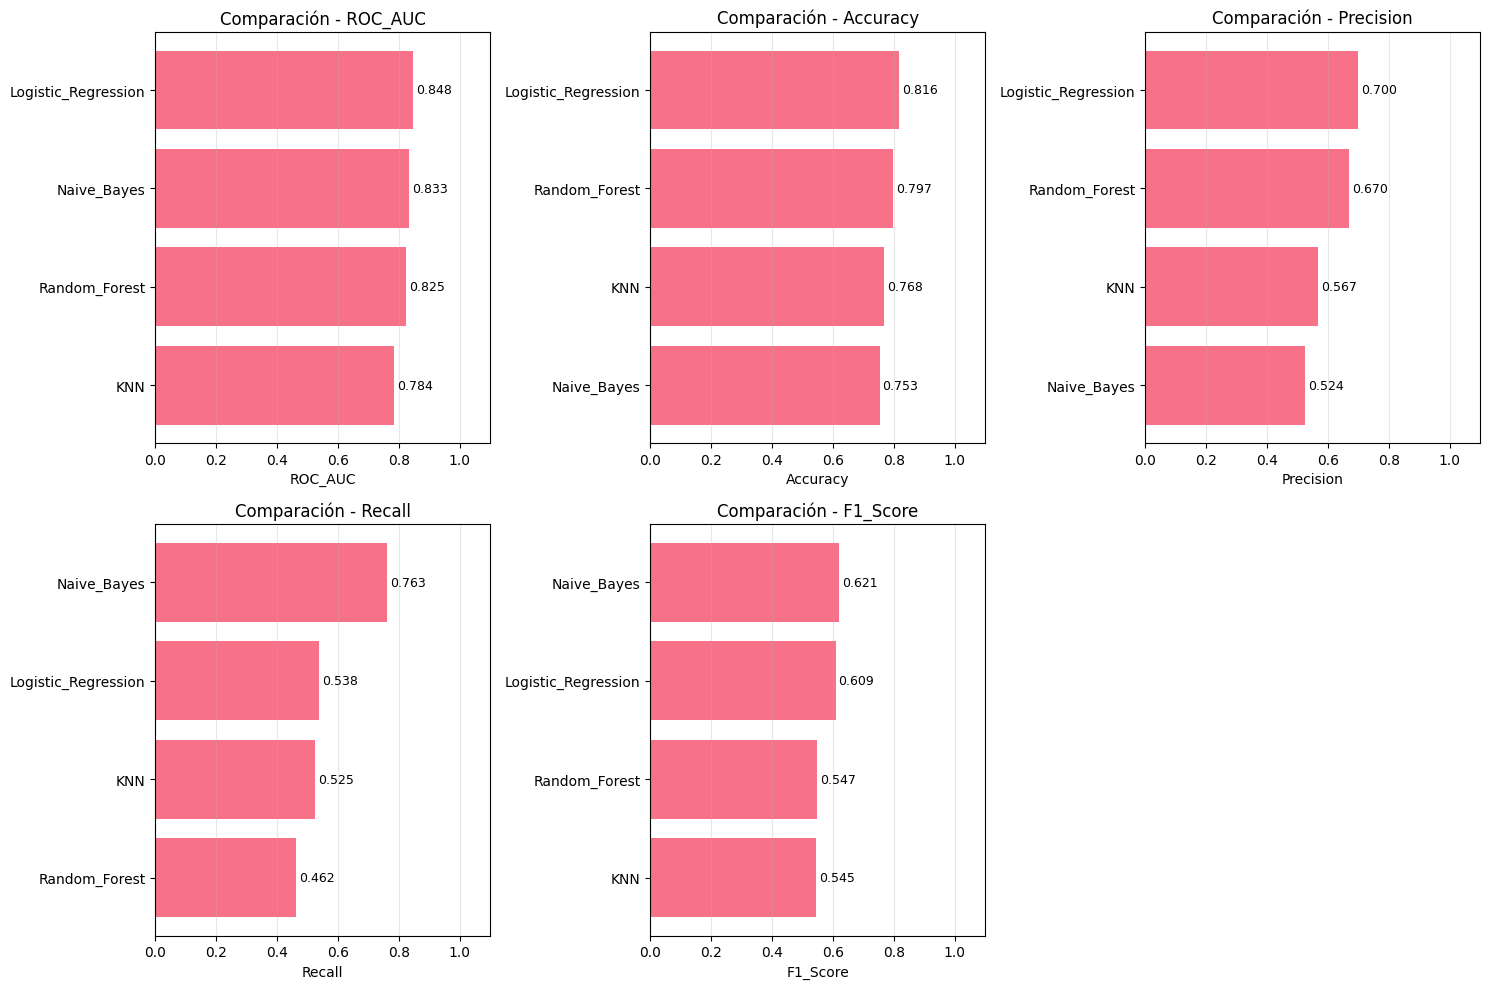

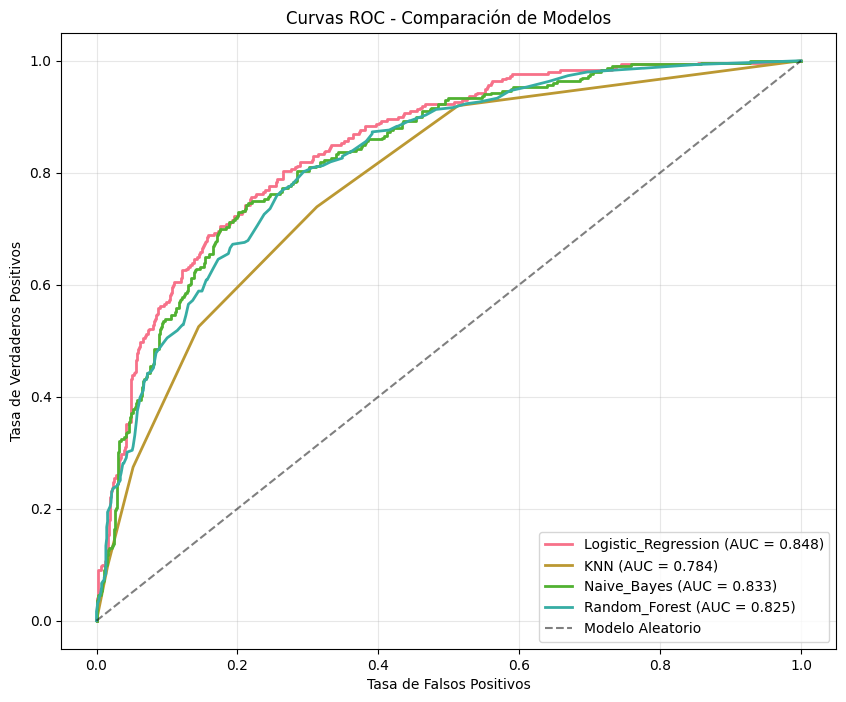


✅ Reporte completo generado
📋 REPORTE DETALLADO - Logistic_Regression

📊 Métricas Básicas:
   Accuracy: 0.8163
   Precision: 0.8074
   Recall: 0.8163
   F1 Score: 0.8080
   Roc Auc: 0.8482
   Average Precision: 0.6667

🎯 Métricas de Matriz de Confusión:
   Verdaderos Positivos: 161
   Verdaderos Negativos: 759
   Falsos Positivos: 69
   Falsos Negativos: 138
   Sensibilidad (Recall): 0.5385
   Especificidad: 0.9167

📈 Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.85      0.92      0.88       828
       Churn       0.70      0.54      0.61       299

    accuracy                           0.82      1127
   macro avg       0.77      0.73      0.74      1127
weighted avg       0.81      0.82      0.81      1127


📊 Generando visualizaciones...


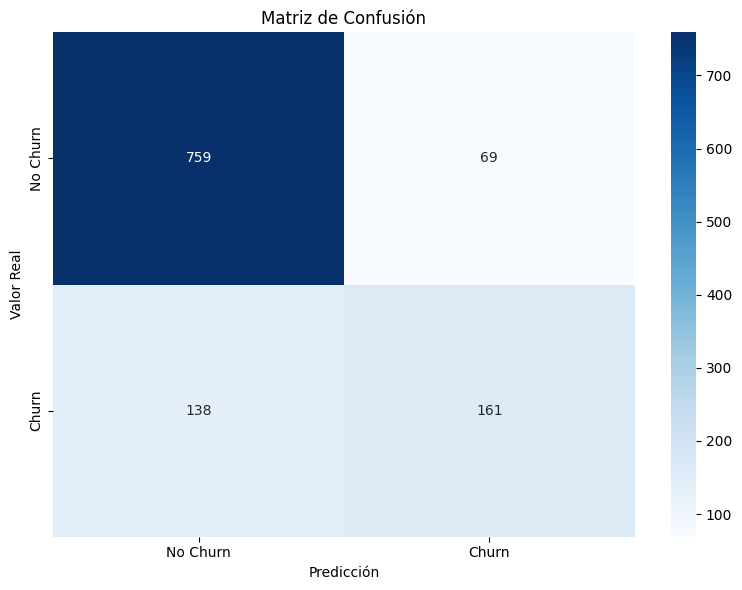

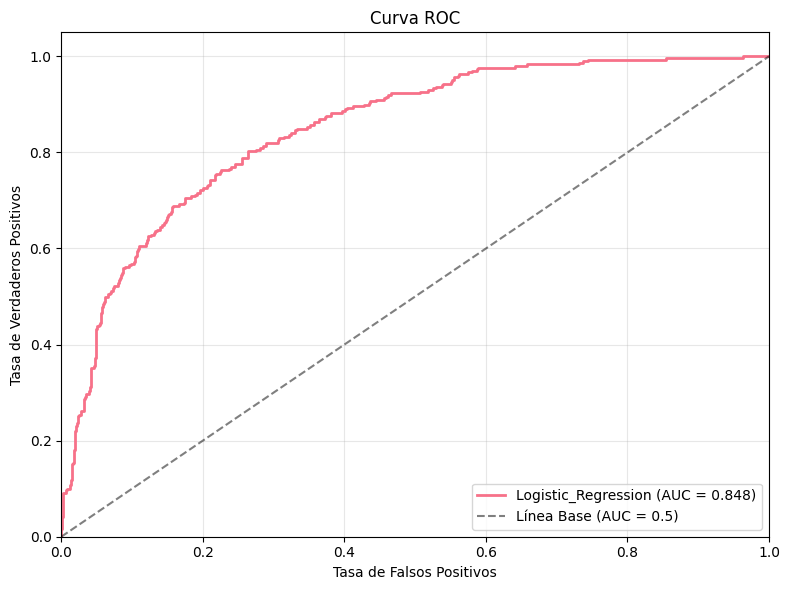

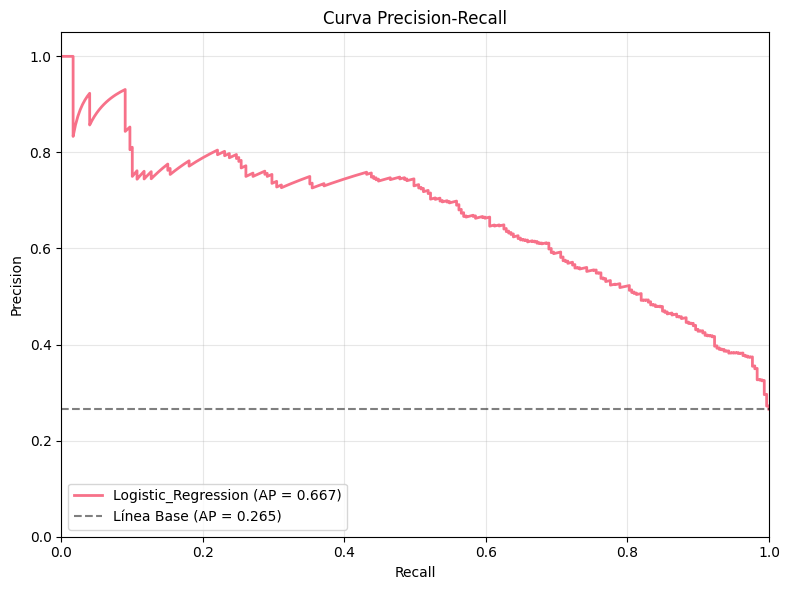


🎯 Métricas de Curvas:
   ROC AUC: 0.8482
   Average Precision: 0.6667

🏆 Mejor modelo seleccionado: Logistic_Regression


In [20]:
# 4.4 Evaluación de modelos
try:
    from metrics import MetricsCalculator
    
          

    
    #📊 Evaluando modelos..."
    results = predictor.evaluate_models(X_val, y_val)
    best_model_name, best_model = predictor.get_best_model('ROC_AUC',results)
    predictor.generate_model_report(X_val, y_val)
    calc = MetricsCalculator()
    y_pred = best_model.predict(X_val)
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]
    detailed_report = calc.generate_detailed_report(y_val, y_pred, y_pred_proba, class_names=['No Churn', 'Churn'], model_name=best_model_name)
    print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")
except ImportError:
    print("⚠️ Módulo metrics no disponible, evaluando modelos básicamente...")
    results = predictor.evaluate_models(X_val, y_val)
    best_model_name, best_model = predictor.get_best_model('ROC_AUC')
    print(f"\n🏆 Mejor modelo seleccionado: {best_model_name}")

#  **5. Selección de Modelo y Generación de Submission para Kaggle**

## Basado en tus resultados de validación, elige el mejor modelo . Luego, re-entrénalo usando **todos los datos de `train.csv`** y úsalo para hacer predicciones sobre `test.csv`.

In [31]:
# 🔧 CONFIGURACIÓN Y ENTRENAMIENTO DEL CHURNPREDICTOR

from models import ChurnPredictor

print("🚀 Inicializando ChurnPredictor...")

# Usar los datos ORIGINALES (antes del preprocesamiento) para crear el preprocesador
predictor = ChurnPredictor(random_state=42)

# Verificar y limpiar datos antes del preprocesamiento
print("🔍 Verificando datos antes del preprocesamiento...")

# Asumir que X_train son los datos originales (con customerID y sin procesar)
# Necesitamos remover customerID de X_train si existe
if 'customerID' in X_train.columns:
    X_train_clean = X_train.drop(['customerID'], axis=1)
else:
    X_train_clean = X_train.copy()

#customerIDs lo guardo para usarn en la generación del archivo de submit.
customer_ids = X_test['customerID']

# Necesitamos remover customerID de X_test si existe
if 'customerID' in X_test.columns:
    X_test_clean = X_test.drop(['customerID'], axis=1)
else:
    X_test_clean = X_test.copy()


# SINCRONIZACIÓN FINAL: Asegurar que X e y tengan el mismo número de muestras
if X_train_clean.shape[0] != y_train.shape[0]:
    print(f"⚠️ Sincronizando datos finales:")
    print(f"   - X_train_clean: {X_train_clean.shape[0]} → ", end="")
    print(f"   - y_train: {y_train.shape[0]} → ", end="")
    
    min_samples = min(X_train_clean.shape[0], y_train.shape[0])
    X_train_clean = X_train_clean.iloc[:min_samples]
    y_train_sync = y_train.iloc[:min_samples] if hasattr(y_train, 'iloc') else y_train[:min_samples]
    
    print(f"Sincronizados a {min_samples} muestras")
else:
    y_train_sync = y_train
    print("✅ Datos ya están sincronizados")

# IMPORTANTE: Mapear y_train_sync para consistencia de tipos
print(f"\n🔧 Mapeando y_train_sync a formato numérico...")
y_train_sync = predictor.map_target(y_train_sync)

# Crear el preprocesador con los datos originales
preprocessor = predictor.create_preprocessor(X_train_clean)

print("✅ Preprocesador configurado exitosamente")
print(f"📊 Características procesadas: {X_train_clean.shape[1]}")
print(f"📊 Muestras para entrenamiento: {X_train_clean.shape[0]}")

# Crear los modelos (esto automáticamente usa el preprocesador)
models = predictor.create_models()

# ENTRENAR con los datos sincronizados
print("\n🎯 Iniciando entrenamiento con datos sincronizados...")
predictor.train_models(X_train_clean, y_train_sync)

print("\n🎉 Entrenamiento completado para todos los modelos:")
for model_name in models.keys():
    print(f"   ✅ {model_name}")

print(f"\n📊 Resumen del entrenamiento:")
print(f"   - Datos de entrenamiento: {X_train_clean.shape}")
print(f"   - Etiquetas: {y_train_sync.shape if hasattr(y_train_sync, 'shape') else len(y_train_sync)}")
print(f"   - Modelos entrenados: {len(models)}")

🚀 Inicializando ChurnPredictor...
🔍 Verificando datos antes del preprocesamiento...
✅ Datos ya están sincronizados

🔧 Mapeando y_train_sync a formato numérico...
🔍 Valores únicos antes del mapeo: ['No' 'Yes']
✅ Valores únicos después del mapeo: [0 1]
📊 Preprocesador configurado:
   - Numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
   - Binarias: ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
   - Categóricas: ['gender', 'InternetService', 'Contract', 'PaymentMethod']
✅ Preprocesador configurado exitosamente
📊 Características procesadas: 20
📊 Muestras para entrenamiento: 5634
🤖 Modelos creados: ['Logistic_Regression', 'KNN', 'Naive_Bayes', 'Random_Forest']

🎯 Iniciando entrenamiento con datos sincronizados...
🎯 Entrenando modelos...
   - Muestras de entrenamiento: 5,634
   - Características: 20
   🔄 Entrenando Logistic_R

# **Función para generar el archivo de submission**

In [32]:
# Predicciones finales y creación del archivo de submission
from submission import create_submission_file

print("📄 Generando predicciones finales...")

# # Preparar datos de test - remover customerID pero guardarlo
# customer_ids = X_test['customerID']
# X_train_features = X_train.drop(['customerID'], axis=1)
#X_test_features = X_test.drop(['customerID'], axis=1)
# best_model = predictor.get_best_model()

# # Verificar que las columnas coincidan entre train y test
# print(f"📊 Verificando alineación de características:")
# print(f"   - Train features: {X_train_features.shape[1]} columnas")
# print(f"   - Test features: {X_test_features.shape[1]} columnas")

# # Verificar si las columnas son las mismas
# train_cols = set(X_train_features.columns)
# test_cols = set(X_test_features.columns)

# if train_cols == test_cols:
#     print("   ✅ Las columnas están perfectamente alineadas")
# else:
#     missing_in_test = train_cols - test_cols
#     extra_in_test = test_cols - train_cols
#     if missing_in_test:
#         print(f"   ⚠️ Columnas faltantes en test: {missing_in_test}")
#     if extra_in_test:
#         print(f"   ⚠️ Columnas extra en test: {extra_in_test}")

print(f"📊 Datos para entrenamiento final: {len(X_train_clean):,} muestras")

# Crear archivo de submission
submission_df = create_submission_file(
    final_model=best_model,
    X_train_full=X_train_clean,  # Solo características
    y_train_full=y_train_sync,   # Variable objetivo sincronizada.
    X_test_full=X_test_clean, # Solo características de test
    customer_ids=customer_ids,
    filename="submission_grupoM.csv"
)

# Mostrar primeras predicciones
print(f"\n📋 Primeras 10 predicciones:")
print(submission_df.head(10))

# Estadísticas de las predicciones
predictions = submission_df.iloc[:, 1].values
print(f"\n📊 Estadísticas de predicciones:")
print(f"   - Predicciones de churn (>0.5): {np.sum(predictions > 0.5):,} ({np.mean(predictions > 0.5)*100:.1f}%)")
print(f"   - Predicciones de no churn (≤0.5): {np.sum(predictions <= 0.5):,} ({np.mean(predictions <= 0.5)*100:.1f}%)")
print(f"   - Rango: [{predictions.min():.4f}, {predictions.max():.4f}]")

print(f"\n✅ Archivo de submission 'submission_grupoM.csv' creado exitosamente")
print(f"🎯 Listo para subir a Kaggle!")

📄 Generando predicciones finales...
📊 Datos para entrenamiento final: 5,634 muestras
Entrenando el modelo final con todos los datos de entrenamiento...
Modelo final entrenado.
Generando predicciones de probabilidad sobre el conjunto de prueba...
Creando el archivo de submission 'submission_grupoM.csv'...
Archivo 'submission_grupoM.csv' generado exitosamente.
Primeras 5 filas del archivo de submission:


,customerID,Churn
0,4376-KFVRS,0.044974
1,2754-SDJRD,0.684831
2,9917-KWRBE,0.061314
3,0365-GXEZS,0.397019
4,9385-NXKDA,0.021527



📋 Primeras 10 predicciones:
   customerID     Churn
0  4376-KFVRS  0.044974
1  2754-SDJRD  0.684831
2  9917-KWRBE  0.061314
3  0365-GXEZS  0.397019
4  9385-NXKDA  0.021527
5  4686-UXDML  0.603442
6  2227-JRSJX  0.446131
7  4830-FAXFM  0.130174
8  1830-IPXVJ  0.003038
9  4690-LLKUA  0.394878

📊 Estadísticas de predicciones:
   - Predicciones de churn (>0.5): 316 (22.4%)
   - Predicciones de no churn (≤0.5): 1,093 (77.6%)
   - Rango: [0.0018, 0.8560]

✅ Archivo de submission 'submission_grupoM.csv' creado exitosamente
🎯 Listo para subir a Kaggle!


In [ ]:
# Optimización de hiperparámetros para el mejor modelo
from models import hyperparameter_tuning

print(f"🔧 Optimizando hiperparámetros para {best_model_name}...")

# Definir grillas de parámetros según el modelo
if 'Logistic' in best_model_name:
    param_grid = {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__solver': ['liblinear', 'lbfgs']
    }
elif 'KNN' in best_model_name:
    param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }
elif 'Random' in best_model_name:
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    }
else:
    # Para Naive Bayes u otros
    param_grid = {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }

# Realizar búsqueda de hiperparámetros
grid_search = hyperparameter_tuning(
    best_model, param_grid, X_train, y_train,
    cv=5, scoring='roc_auc'
)

print(f"\n🎯 Hiperparámetros optimizados:")
print(f"   - Mejor score CV: {grid_search.best_score_:.4f}")
print(f"   - Mejores parámetros: {grid_search.best_params_}")

# Actualizar el mejor modelo con los parámetros optimizados
optimized_model = grid_search.best_estimator_

# Evaluar modelo optimizado
y_pred_opt = optimized_model.predict(X_val)
y_pred_proba_opt = optimized_model.predict_proba(X_val)[:, 1]

# Calcular métricas del modelo optimizado
from sklearn.metrics import roc_auc_score, accuracy_score
opt_auc = roc_auc_score(y_val, y_pred_proba_opt)
opt_acc = accuracy_score(y_val, y_pred_opt)

print(f"\n📈 Mejora con optimización:")
print(f"   - ROC AUC original: {results[best_model_name]['ROC_AUC']:.4f}")
print(f"   - ROC AUC optimizado: {opt_auc:.4f}")
print(f"   - Mejora: {opt_auc - results[best_model_name]['ROC_AUC']:.4f}")

# Guardar el modelo optimizado
best_model = optimized_model

#  **6. Conclusiones (Opcional pero Recomendado)**

## Escribe un breve resumen de tus hallazgos.
* ## ¿Qué modelo funcionó mejor y por qué crees que fue así?
* ## ¿Cuáles fueron las características más importantes o los descubrimientos más interesantes del EDA?
* ## ¿Qué desafíos encontraron y cómo los resolvieron?

#  **6. Conclusiones (Opcional pero Recomendado)**

## Escribe un breve resumen de tus hallazgos.
* ## ¿Qué modelo funcionó mejor y por qué crees que fue así?
* ## ¿Cuáles fueron las características más importantes o los descubrimientos más interesantes del EDA?
* ## ¿Qué desafíos encontraron y cómo los resolvieron?


# 📚 Referencias y Recursos de Machine Learning y Estadística

## 📖 Libros y Recursos Disponibles en este Repositorio

Este repositorio incluye materiales y notebooks de los siguientes libros de referencia en Machine Learning y Estadística:

### 🤖 **Machine Learning y Data Science**

#### 1. **ISLP Labs - Introduction to Statistical Learning with Python**
- 📂 **Ubicación**: `/notebooks/ISLP_labs/`
- 📝 **Descripción**: Implementación completa en Python del famoso libro "Introduction to Statistical Learning"
- 🔗 **Temas cubiertos**:
  - Regresión Linear y Logística
  - Árboles de Decisión y Random Forest
  - Support Vector Machines
  - K-Means y Clustering
  - Cross-validation y Bootstrap
  - Análisis Discriminante (LDA/QDA)

#### 2. **Machine Learning with PyTorch and Scikit-Learn**
- 📂 **Ubicación**: `/notebooks/Machine-Learning-with-Pytorch-Scikit-Learn/`
- 📝 **Descripción**: Implementaciones prácticas combinando PyTorch y scikit-learn
- 🔗 **Temas cubiertos**:
  - Deep Learning con PyTorch
  - Redes Neuronales desde cero
  - Computer Vision y NLP
  - MLOps y despliegue de modelos

#### 3. **Mathematics for Machine Learning**
- 📂 **Ubicación**: `/notebooks/mml-book.github.io/`
- 📝 **Descripción**: Fundamentos matemáticos para Machine Learning
- 🔗 **Temas cubiertos**:
  - Álgebra Linear
  - Cálculo y Optimización
  - Probabilidad y Estadística
  - Análisis de Componentes Principales

### 📊 **Estadística Aplicada**

#### 4. **Practical Statistics for Data Scientists**
- 📂 **Ubicación**: `/notebooks/practical-statistics-for-data-scientists/`
- 📝 **Descripción**: Estadística práctica aplicada a ciencia de datos
- 🔗 **Temas cubiertos**:
  - Estadística descriptiva y exploratoria
  - Distribuciones de probabilidad
  - Inferencia estadística
  - Diseño experimental
  - Regresión avanzada

### 🏆 **Competencias Kaggle**

#### 5. **Kaggle Competitions**
- 📂 **Ubicación**: `/notebooks/kaggle_competitions/`
- 📝 **Descripción**: Soluciones a competencias de Kaggle
- 🔗 **Proyectos incluidos**:
  - **Titanic**: Predicción de supervivencia
  - Y más competencias en desarrollo...

## 🚀 Cómo usar estos recursos

### Navegación por los libros:
```bash
# Explorar ISLP Labs
cd /notebooks/ISLP_labs/

# Ver Machine Learning con PyTorch
cd /notebooks/Machine-Learning-with-Pytorch-Scikit-Learn/

# Revisar estadística práctica
cd /notebooks/practical-statistics-for-data-scientists/
```

### Estructura típica de cada libro:
- `📁 chapters/` - Notebooks por capítulo
- `📁 datasets/` - Datasets de ejemplo
- `📁 solutions/` - Soluciones a ejercicios
- `📄 README.md` - Guía de uso específica

## 💡 Recomendaciones de estudio

### Para principiantes:
1. **Comenzar con ISLP Labs** - Fundamentos sólidos
2. **Practical Statistics** - Comprensión estadística
3. **Kaggle Competitions** - Práctica hands-on

### Para nivel intermedio/avanzado:
1. **Mathematics for ML** - Profundizar en teoría
2. **PyTorch & Scikit-Learn** - Implementaciones avanzadas
3. **Proyectos personales** - Aplicar conocimientos

## 🔗 Enlaces útiles

- [ISLP Official Website](https://www.statlearning.com/)
- [PyTorch Documentation](https://pytorch.org/docs/)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Kaggle Learn](https://www.kaggle.com/learn)

---
*Última actualización: Julio 2025*